# 使用 Keras 搭建的多层感知机神经网络进行分类预测

In [1]:
import numpy as np
import pandas as pd

data_train = pd.read_csv('../input/train.csv')
data_test = pd.read_csv('../input/test.csv')

In [2]:
y = data_train.Survived

In [3]:
ID = data_test.PassengerId

In [4]:
data_train.drop(
    ['PassengerId', 'Name', 'Ticket', 'Survived'], axis=1, inplace=True)
data_test.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [5]:
from sklearn.preprocessing import MinMaxScaler


def preprocess_data(raw_df):

    age_mean = raw_df['Age'].mean()
    raw_df['Age'].fillna(age_mean, inplace=True)

    fare_mean = raw_df['Fare'].mean()
    raw_df['Fare'].fillna(fare_mean, inplace=True)

    raw_df['Sex'] = raw_df['Sex'].map({'female': 0, 'male': 1})

    raw_df.loc[raw_df.Cabin.notnull(), 'Cabin'] = 'yes'
    raw_df.loc[raw_df.Cabin.isnull(), 'Cabin'] = 'no'

    raw_df['Cabin'] = raw_df['Cabin'].map({'yes': 1, 'no': 0})

    raw_df.Pclass = raw_df.Pclass.astype(str)


preprocess_data(data_train)
preprocess_data(data_test)

In [6]:
def standard_scaler_and_one_hot(raw_df):

    Pclass_dummies = pd.get_dummies(raw_df.Pclass, prefix='Pclass')
    Embarked_dummies = pd.get_dummies(raw_df.Embarked, prefix='Embarked')

    raw_df = pd.concat(
        [
            raw_df[['Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Cabin']],
            Pclass_dummies, Embarked_dummies
        ],
        axis=1)
    
    return raw_df

In [7]:
data_train = standard_scaler_and_one_hot(data_train)
data_test = standard_scaler_and_one_hot(data_test)

In [8]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

data_train_ss = ss.fit_transform(data_train)
data_test_ss = ss.transform(data_test)

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


In [9]:
data_train.shape

(891, 12)

In [10]:
data_test.shape

(418, 12)

## 建模

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

model = Sequential()
model.add(
    Dense(
        units=40,
        input_dim=12,
        kernel_initializer='uniform',
        activation='relu'))

model.add(Dense(units=30, kernel_initializer='uniform', activation='relu'))
model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
model.summary()

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 40)                520       
_________________________________________________________________
dense_2 (Dense)              (None, 30)                1230      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 1,781
Trainable params: 1,781
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(
    loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [13]:
train_history = model.fit(
    x=data_train_ss,
    y=y,
    validation_split=0.2,
    epochs=30,
    batch_size=30,
    verbose=2)

Train on 712 samples, validate on 179 samples
Epoch 1/30
 - 0s - loss: 0.6898 - acc: 0.5913 - val_loss: 0.6799 - val_acc: 0.6592
Epoch 2/30
 - 0s - loss: 0.6652 - acc: 0.6742 - val_loss: 0.6171 - val_acc: 0.7933
Epoch 3/30
 - 0s - loss: 0.5916 - acc: 0.7472 - val_loss: 0.5041 - val_acc: 0.8156
Epoch 4/30
 - 0s - loss: 0.5284 - acc: 0.7683 - val_loss: 0.4371 - val_acc: 0.8492
Epoch 5/30
 - 0s - loss: 0.4856 - acc: 0.7963 - val_loss: 0.3963 - val_acc: 0.8659
Epoch 6/30
 - 0s - loss: 0.4574 - acc: 0.8048 - val_loss: 0.3792 - val_acc: 0.8492
Epoch 7/30
 - 0s - loss: 0.4424 - acc: 0.8062 - val_loss: 0.3654 - val_acc: 0.8547
Epoch 8/30
 - 0s - loss: 0.4364 - acc: 0.8132 - val_loss: 0.3665 - val_acc: 0.8715
Epoch 9/30
 - 0s - loss: 0.4308 - acc: 0.8048 - val_loss: 0.3580 - val_acc: 0.8659
Epoch 10/30
 - 0s - loss: 0.4257 - acc: 0.8132 - val_loss: 0.3602 - val_acc: 0.8492
Epoch 11/30
 - 0s - loss: 0.4244 - acc: 0.8132 - val_loss: 0.3612 - val_acc: 0.8492
Epoch 12/30
 - 0s - loss: 0.4232 - acc:

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['STHeiti'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


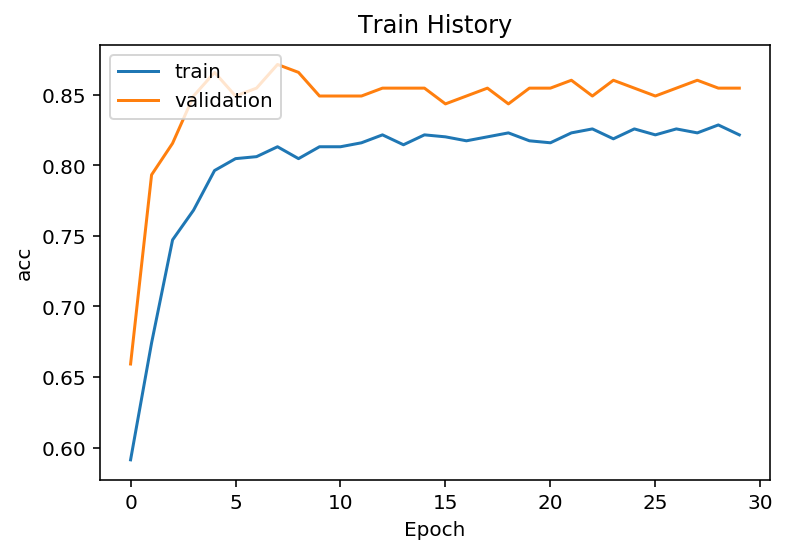

In [14]:
import matplotlib.pyplot as plt


def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train], label='train')
    plt.plot(train_history.history[validation], label='validation')
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.show()


show_train_history(train_history, 'acc', 'val_acc')

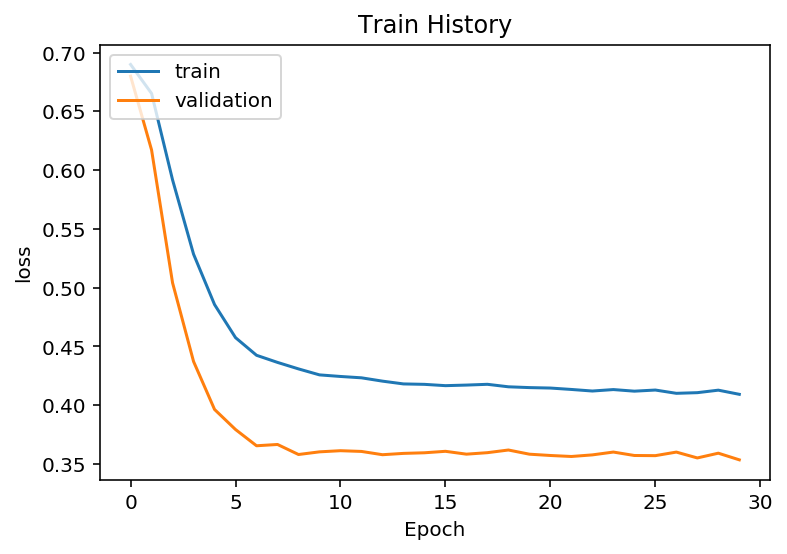

In [15]:
show_train_history(train_history, 'loss', 'val_loss')

In [16]:
y_pred = model.predict_classes(x=data_test_ss, verbose=2)
res = pd.DataFrame({'PassengerId': ID, 'Survived': y_pred.ravel()})
res.to_csv('keras_mlp.csv', index=False)